<div style="text-align: center;" >
<h1 style="margin-top: 0.2em; margin-bottom: 0.1em;">Assignment 3</h1>
<h4 style="margin-top: 0.7em; margin-bottom: 0.3em; font-style:italic">Commit your solutions to GitHub until June 21, 23:59</h4>
</div>
<br>

## Part 1 
## Sentiment Evaluation of Twitter and YouTube Data

### Tasks

1. Install packages and load evaluation datasets with Google NLP scores
2. Run VADER over evaluation texts
3. Run BERT over evaluation texts
4. Evaluate against sentiment annotations and compare with Google NLP

### Install requirements. 

The following cell contains all the necessary dependencies needed for this task. If you run the cell everything will be installed. 

* [`vaderSentiment`](https://github.com/cjhutto/vaderSentiment) is a Python package for a Parsimonious Rule-based Model for Sentiment Analysis of Social Media Text.
* [`transformers`](https://huggingface.co/) is a Python package for creating and working with transformers. [Here](https://huggingface.co/docs) is the documentation of `transformers`.
* [`torch`](https://pytorch.org/) is a Python machine learning framework. We need this here for `transformers` since this package uses internally `torch`. [Here](https://pytorch.org/docs/stable/index.html) is the documentation of `torch`.
* [`pandas`](https://pandas.pydata.org/docs/index.html) is a Python package for creating and working with tabular data. [Here](https://pandas.pydata.org/docs/reference/index.html) is the documentation of `pandas`.

You may need to restart the Kernel after installing the dependencies!

### Import requirements
The cell below imports all necessary dependancies. Make sure they are installed (see cell above).

In [1]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from transformers import pipeline

### Exercise 1: Load evaluation datasets and Google NLP scores

#### 1.1 Load datasets
First read the Twitter and Youtube Comments CSV files (`Twitter-Sentiment.csv` and `YouTubeComments-Sentiment.csv`) and save them in a pandas Dataframe.

In [2]:
# Load datasets
twitter_df = pd.read_csv('Twitter-Sentiment.csv')
youtube_df = pd.read_csv('YouTubeComments-Sentiment.csv')

In [3]:
# check info
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   label        4209 non-null   object 
 1   text         4209 non-null   object 
 2   googleScore  4209 non-null   float64
dtypes: float64(1), object(2)
memory usage: 98.8+ KB


In [4]:
twitter_df.head()

,label,text,googleScore
0,Positive,?RT @justinbiebcr: The bigger the better....if...,0.3
1,Positive,"Listening to the ""New Age"" station on @Slacker...",0.2
2,Neutral,I favorited a YouTube video -- Drake and Josh ...,0.0
3,Positive,i didnt mean knee high I ment in lengt it goes...,0.8
4,Neutral,I wana see the vid Kyan,0.0


In [5]:
# check info
youtube_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3293 entries, 0 to 3292
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   label        3293 non-null   object 
 1   text         3293 non-null   object 
 2   googleScore  3293 non-null   float64
dtypes: float64(1), object(2)
memory usage: 77.3+ KB


In [6]:
youtube_df.head()

,label,text,googleScore
0,Negative,when the time comes for all to know it will be...,0.1
1,Neutral,@princessofportk The first are a pair of devil...,0.1
2,Neutral,I gotta feeling they partlishly took it off fo...,-0.3
3,Positive,"As we look at ways to be relevant, here is a g...",0.7
4,Neutral,"Not a lot of ""removing"" going on here... bucke...",-0.3


### Exercise 2: Run VADER over evaluation texts *(2 points)*

#### 2.1 Run VADER over the first tweet

In this task you should use VADER for sentiment analysis. For this we use the `vaderSentiment` package. You first have to instantiate a new `SentimentIntensityAnalyzer` and use the `polarity_scores` method of it for the analysis. Apply this for the first tweet. Is it a good classification?

[Here](https://github.com/cjhutto/vaderSentiment) under 'Code Examples' you can find some example code how to use this package.

In [7]:
analyzer = SentimentIntensityAnalyzer()
sentiment_scores = analyzer.polarity_scores(twitter_df['text'][0])
sentiment_scores

{'neg': 0.0, 'neu': 0.853, 'pos': 0.147, 'compound': 0.2263}

**Answer:** 
The label of the tweet is 'positive', the result of sentiment analyzer states that the tweet is neutral. 

#### 2.2 Run VADER over each text

Now use VADER for all the text data of the Twitter and the Youtube dataframe. Create a new column in the dataframes called `VADER_compound` where you save the `compound` result (look at the output dictonary of the `polarity_scores` method).

*Important: Make sure `compound` is a float*

In [8]:
# apply sentiment analysis and create 'VADER_compound' column for Twitter DataFrame
twitter_df['VADER_compound'] = twitter_df['text'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

# apply sentiment analysis and create 'VADER_compound' column for YouTube DataFrame
youtube_df['VADER_compound'] = youtube_df['text'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

In [9]:
#check the result 
twitter_df.head()

,label,text,googleScore,VADER_compound
0,Positive,?RT @justinbiebcr: The bigger the better....if...,0.3,0.2263
1,Positive,"Listening to the ""New Age"" station on @Slacker...",0.2,0.0000
2,Neutral,I favorited a YouTube video -- Drake and Josh ...,0.0,0.4019
3,Positive,i didnt mean knee high I ment in lengt it goes...,0.8,0.8632
4,Neutral,I wana see the vid Kyan,0.0,0.0000


In [10]:
youtube_df.head()

,label,text,googleScore,VADER_compound
0,Negative,when the time comes for all to know it will be...,0.1,0.0000
1,Neutral,@princessofportk The first are a pair of devil...,0.1,-0.1027
2,Neutral,I gotta feeling they partlishly took it off fo...,-0.3,0.0644
3,Positive,"As we look at ways to be relevant, here is a g...",0.7,0.5719
4,Neutral,"Not a lot of ""removing"" going on here... bucke...",-0.3,0.0000


#### 2.3 VADER as a classifier

To get the three Classes `Positive`, `Negative` and `Neutral` we use the compound score with the following thresholds:

* `compound > 0.5`: `"Positive"`
* `compound < -0.5`: `"Negative"`
* `else`: `"Neutral"`

Create a new column called `VADER_class` which contains the three computed classes.

In [11]:
# function to apply sentiment analysis and extract sentiment class
def get_sentiment_class(compound_score):
    if compound_score > 0.5:
        return "Positive"
    elif compound_score < -0.5:
        return "Negative"
    else:
        return "Neutral"

# create 'VADER_class' column for Twitter DataFrame
twitter_df['VADER_class'] = twitter_df['VADER_compound'].apply(get_sentiment_class)

# create 'VADER_class' column for YouTube DataFrame
youtube_df['VADER_class'] = youtube_df['VADER_compound'].apply(get_sentiment_class)

In [12]:
#check result 
twitter_df.head()

,label,text,googleScore,VADER_compound,VADER_class
0,Positive,?RT @justinbiebcr: The bigger the better....if...,0.3,0.2263,Neutral
1,Positive,"Listening to the ""New Age"" station on @Slacker...",0.2,0.0000,Neutral
2,Neutral,I favorited a YouTube video -- Drake and Josh ...,0.0,0.4019,Neutral
3,Positive,i didnt mean knee high I ment in lengt it goes...,0.8,0.8632,Positive
4,Neutral,I wana see the vid Kyan,0.0,0.0000,Neutral


In [13]:
youtube_df.head()

,label,text,googleScore,VADER_compound,VADER_class
0,Negative,when the time comes for all to know it will be...,0.1,0.0000,Neutral
1,Neutral,@princessofportk The first are a pair of devil...,0.1,-0.1027,Neutral
2,Neutral,I gotta feeling they partlishly took it off fo...,-0.3,0.0644,Neutral
3,Positive,"As we look at ways to be relevant, here is a g...",0.7,0.5719,Positive
4,Neutral,"Not a lot of ""removing"" going on here... bucke...",-0.3,0.0000,Neutral


### Exercise 3: Use a BERT based model for sentiment analysis *(2 points)*

#### 3.1 BERT
BERT (Bidirectional Encoder Representation from Transformers) is a machine learning technique for natural language processing. There are already pretrained models available in the `transformers` package. You can look [here](https://huggingface.co/models?sort=downloads&search=sentiment) and choose a model for the next tasks. (We suggest [this](https://huggingface.co/cardiffnlp/twitter-roberta-base-sentiment-latest) (`"cardiffnlp/twitter-roberta-base-sentiment-latest"`) model, but you can use any available, just make sure it is suitable for sentiment analysis).

First create a `pipeline` where you set your model by the `model` keyword argument. You can then use this method to pass text which should be classified. [Here](https://huggingface.co/blog/sentiment-analysis-python#2-how-to-use-pre-trained-sentiment-analysis-models-with-python) is a tutorial how to use this.

As before save the classes in a new column 'BERT_class'. The call to your pipeline returns a dictionary where there is a key `label` which contains already the `positive`, `negative` or `neutral` class (Be aware that this is based on the model you choose, and might be different from the labels in the dataset. If that's the case you have to rename them to match the target labels).

***Hint: The classification of the entire sample can take a couple of minutes. Make sure to save the labeled dataset in a csv file so that you don't need to rerun the classification the next time you run your notebook.***

In [14]:
# Hint -> loading roberta as a pipline
sentiment_pipeline = pipeline(model="cardiffnlp/twitter-roberta-base-sentiment-latest", tokenizer="cardiffnlp/twitter-roberta-base-sentiment-latest")

Downloading: 0.00B [00:00, ?B/s]

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [15]:
# Hint -> using a pipline for classification
sentiment_pipeline('Today is a great day!')

[{'label': 'positive', 'score': 0.9866099953651428}]

In [16]:
# apply sentiment classification and create 'BERT_class' column for Twitter DataFrame
twitter_df['BERT_class'] = twitter_df['text'].apply(lambda x: sentiment_pipeline(x)[0]['label'])

# apply sentiment classification and create 'BERT_class' column for YouTube DataFrame
youtube_df['BERT_class'] = youtube_df['text'].apply(lambda x: sentiment_pipeline(x)[0]['label'])

In [17]:
#save result 
twitter_df.to_csv('twitter_labeled.csv')
youtube_df.to_csv('youtube_labeled.csv')

In [18]:
twitter_df = pd.read_csv('twitter_labeled.csv')
youtube_df = pd.read_csv('youtube_labeled.csv')

### Exercise 4: Evaluate against sentiment annotations and compare with Google NLP *(4 points)*

#### 4.1 Convert GoogleNLP scores to classes

As with VADER and BERT, compute classes from the GoogleNLP score, which is given in the column `googleScore`. For this use following thresholds:

* `googleScore > 0.3`: `"Positive"`
* `googleScore < -0.3`: `"Negative"`
* `else`: `"Neutral"`

Save the classes in a new column named `GoogleNLP_class`.


In [19]:
# function to extract googleScore sentiment class 
def get_google_sentiment_class(score):
    if score > 0.3:
        return "Positive"
    elif score < -0.3:
        return "Negative"
    else:
        return "Neutral"
    
twitter_df['Google_class'] = twitter_df['googleScore'].apply(get_google_sentiment_class)
youtube_df['Google_class'] = youtube_df['googleScore'].apply(get_google_sentiment_class)

In [20]:
#check 
twitter_df.head()

,Unnamed: 0,label,text,googleScore,VADER_compound,VADER_class,BERT_class,Google_class
0,0,Positive,?RT @justinbiebcr: The bigger the better....if...,0.3,0.2263,Neutral,positive,Neutral
1,1,Positive,"Listening to the ""New Age"" station on @Slacker...",0.2,0.0000,Neutral,neutral,Neutral
2,2,Neutral,I favorited a YouTube video -- Drake and Josh ...,0.0,0.4019,Neutral,positive,Neutral
3,3,Positive,i didnt mean knee high I ment in lengt it goes...,0.8,0.8632,Positive,positive,Positive
4,4,Neutral,I wana see the vid Kyan,0.0,0.0000,Neutral,neutral,Neutral


#### 4.2 Evaluate on Twitter

First, let's calculate the accuracy for all three classifiers on the Twitter and Youtube data, print the results.

In [21]:
# convert the first letter to capital in the 'text' column
twitter_df['BERT_class'] = twitter_df['BERT_class'].str.capitalize()
youtube_df['BERT_class'] = youtube_df['BERT_class'].str.capitalize()

In [22]:
#function to calculate accuracy
def accuracy(df, class_column):
    score = round(len(df[df['label'] == df[class_column]])/len(df), 2)
    return score 

In [23]:
# get result for Twitter data
twitter_vader_acc = accuracy(twitter_df, 'VADER_class')
print (f'The accuracy of Vader classifier for Twitter data:', twitter_vader_acc)

twitter_bert_acc = accuracy(twitter_df, 'BERT_class')
print (f'The accuracy of Bert classifier for Twitter data:', twitter_bert_acc)

twitter_google_acc =accuracy(twitter_df, 'Google_class')
print (f'The accuracy of Google classifier for Twitter data:', twitter_google_acc)

The accuracy of Vader classifier for Twitter data: 0.69
The accuracy of Bert classifier for Twitter data: 0.63
The accuracy of Google classifier for Twitter data: 0.67


In [24]:
# accuracy score for Youtube data
youtube_vader_acc = accuracy(youtube_df, 'VADER_class')
print (f'The accuracy of Vader classifier for Youtube data:', youtube_vader_acc)

youtube_bert_acc = accuracy(youtube_df, 'BERT_class')
print (f'The accuracy of BERT classifier for Youtube data:', youtube_bert_acc)

youtube_google_acc = accuracy(youtube_df, 'Google_class')
print (f'The accuracy of Google classifier for Youtube data:', youtube_google_acc)

The accuracy of Vader classifier for Youtube data: 0.66
The accuracy of BERT classifier for Youtube data: 0.74
The accuracy of Google classifier for Youtube data: 0.66


Next calculate the precision of the `"Positive"` class for the Twitter and Youtube data.
This is calculated as follows:
$
\begin{align}
    precision = \frac{TP}{TP + FP}
\end{align}
$
*Note: Here the Positive samples are the one with the class `"Positive"`*

In [25]:
# function to calculate precision
def precision(df, class_column, label_class):
    true_positive = df[(df['label'] == label_class) & (df[class_column] == label_class)]
    true_and_false_positive = df[df[class_column] == label_class]
    precision = round(len(true_positive)/len(true_and_false_positive), 2) 
    return precision

In [26]:
#precision for the "Positive" class for Twitter data 
twitter_vader_pre = precision(twitter_df, 'VADER_class', 'Positive')
print(f'The precision score of Vader Positive class for Twitter data:', twitter_vader_pre)

twitter_bert_pre = precision(twitter_df, 'BERT_class', 'Positive')
print(f'The precision score of BERT Positive class for Twitter data:', twitter_bert_pre)

twitter_google_pre = precision(twitter_df, 'Google_class', 'Positive')
print(f'The precision score of Google Positive class for Twitter data:', twitter_google_pre)

The precision score of Vader Positive class for Twitter data: 0.36
The precision score of BERT Positive class for Twitter data: 0.36
The precision score of Google Positive class for Twitter data: 0.34


In [27]:
# сalculate precision for the "Positive" class for Youtube data 
youtube_vader_pre = precision(youtube_df, 'VADER_class', 'Positive')
print(f'The precision score of Vader Positive class for Youtube data:', youtube_vader_pre)

youtube_bert_pre = precision(youtube_df, 'BERT_class', 'Positive')
print(f'The precision score of BERT Positive class for Youtube data:', youtube_bert_pre)

youtube_google_pre = precision(youtube_df, 'Google_class', 'Positive')
print(f'The precision score of Google Positive class for Youtube data:', youtube_google_pre)

The precision score of Vader Positive class for Youtube data: 0.72
The precision score of BERT Positive class for Youtube data: 0.76
The precision score of Google Positive class for Youtube data: 0.77


Now calculate the recall score. This is done by:
$
\begin{align}
    recall = \frac{TP}{TP + FN}
\end{align}
$
*Note: Here the Positive samples are the one with the the class `"Positive"`*

In [28]:
# function to calculate recall 
def recall(df, class_column, label_class):
    true_positive_and_false_negative = df[df['label'] == label_class]
    true_positive = df[(df['label'] == label_class) & (df[class_column] == label_class)]
    recall = round(len(true_positive)/len(true_positive_and_false_negative), 2) 
    return recall

In [29]:
# Calculate recall for the "Positive" class for Twitter data 
twitter_vader_rec = recall(twitter_df, 'VADER_class', 'Positive')
print(f'The recall score of Vader Positive class for Twitter data:', twitter_vader_rec)

twitter_bert_rec = recall(twitter_df, 'BERT_class', 'Positive')
print(f'The recall score of BERT Positive class for Twitter data:', twitter_bert_rec)

twitter_google_rec = recall(twitter_df, 'Google_class', 'Positive')
print(f'The recall score of Google Positive class for Twitter data:', twitter_google_rec)

The recall score of Vader Positive class for Twitter data: 0.73
The recall score of BERT Positive class for Twitter data: 0.91
The recall score of Google Positive class for Twitter data: 0.56


In [30]:
# Calculate recall for the "Positive" class for Youtube data 
youtube_vader_rec = recall(youtube_df, 'VADER_class', 'Positive')
print(f'The recall score of Vader Positive class for Youtube data:', youtube_vader_rec)

youtube_bert_rec = recall(youtube_df, 'BERT_class', 'Positive')
print(f'The recall score of BERT Positive class for Youtube data:', youtube_bert_rec)

youtube_google_rec = recall(youtube_df, 'Google_class', 'Positive')
print(f'The recall score of Google Positive class for Youtube data:', youtube_google_rec)

The recall score of Vader Positive class for Youtube data: 0.69
The recall score of BERT Positive class for Youtube data: 0.92
The recall score of Google Positive class for Youtube data: 0.7


Calculate the Recall and the Precision score now also for the negative class. The Precision is calculated as:
$
\begin{align}
    precision = \frac{TP}{TP + FP}
\end{align}
$
*Note: Here the Positive samples are the one with the the class `"Negative"`*

And the Recall is calculated as:
$
\begin{align}
    recall = \frac{TP}{TP + FN}
\end{align}
$
*Note: Here the Positive samples are the one with the the class `"Negative"`*

In [31]:
# Calculate precision for the 'Negative' class for Twitter data 

twitter_vader_pre_neg = precision(twitter_df, 'VADER_class', 'Negative')
print(f'The precision score of Vader Negative class for Twitter data:', twitter_vader_pre_neg)

twitter_bert_pre_neg = precision(twitter_df, 'BERT_class', 'Negative')
print(f'The precision score of BERT Negative class for Twitter data:', twitter_bert_pre_neg)

twitter_google_pre_neg = precision(twitter_df, 'Google_class', 'Negative')
print(f'The precision score of Google Negative class for Twitter data:', twitter_google_pre_neg)

The precision score of Vader Negative class for Twitter data: 0.4
The precision score of BERT Negative class for Twitter data: 0.38
The precision score of Google Negative class for Twitter data: 0.34


In [32]:
# Calculate precision for the 'Negative' class for Youtube data 
youtube_vader_pre_neg = precision(youtube_df, 'VADER_class', 'Negative')
print(f'The precision score of Vader Negative class for Youtube data:', youtube_vader_pre_neg)

youtube_bert_pre_neg = precision(youtube_df, 'BERT_class', 'Negative')
print(f'The precision score of BERT Negative class for Youtube data:', youtube_bert_pre_neg)

youtube_google_pre_neg = precision(youtube_df, 'Google_class', 'Negative')
print(f'The precision score of Google Negative class for Youtube data:', youtube_google_pre_neg)

The precision score of Vader Negative class for Youtube data: 0.61
The precision score of BERT Negative class for Youtube data: 0.57
The precision score of Google Negative class for Youtube data: 0.57


In [33]:
# Calculate recall for the 'Negative' class for Twitter data 
twitter_vader_rec_neg = recall(twitter_df, 'VADER_class', 'Negative')
print(f'The recall score of Vader Negative class for Twitter data:', twitter_vader_rec_neg)

twitter_bert_rec_neg = recall(twitter_df, 'BERT_class', 'Negative')
print(f'The recall score of BERT Negative class for Twitter data:', twitter_bert_rec_neg)

twitter_google_rec_neg = recall(twitter_df, 'Google_class', 'Negative')
print(f'The recall score of Google Negative class for Twitter data:', twitter_google_rec_neg)

The recall score of Vader Negative class for Twitter data: 0.36
The recall score of BERT Negative class for Twitter data: 0.82
The recall score of Google Negative class for Twitter data: 0.34


In [34]:
# Calculate recall for the 'Negative' class for Youtube data 
youtube_vader_rec_neg = recall(youtube_df, 'VADER_class', 'Negative')
print(f'The recall score of Vader Negative class for Youtube data:', youtube_vader_rec_neg)

youtube_bert_rec_neg = recall(youtube_df, 'BERT_class', 'Negative')
print(f'The recall score of BERT Negative class for Youtube data:', youtube_bert_rec_neg)

youtube_google_rec_neg = recall(youtube_df, 'Google_class', 'Negative')
print(f'The recall score of Google Negative class for Youtube data:', youtube_google_rec_neg)

The recall score of Vader Negative class for Youtube data: 0.36
The recall score of BERT Negative class for Youtube data: 0.81
The recall score of Google Negative class for Youtube data: 0.4


Last, calculate the [F1 score](https://towardsdatascience.com/the-f1-score-bec2bbc38aa6) of the positive and negative class for each classifier and dataset. The F1 score is calculated as:

$
\begin{align}
    F_1 = 2 * \frac{precision * recall}{precision + recall}
\end{align}
$

In [35]:
def f1(precision, recall):
    score = 2 * precision * recall / (precision + recall)
    return round(score, 2)

In [36]:
# Calculate F1 score for the "Positive" class for Twitter data 
twitter_vader_f1_pos = f1(twitter_vader_pre, twitter_vader_rec)
print(f'The f1 score of Vader classifier Positive class for Twitter data:', twitter_vader_f1_pos)

twitter_bert_f1_pos = f1(twitter_bert_pre, twitter_bert_rec)
print(f'The f1 score of Bert classifier Positive class for Twitter data:', twitter_bert_f1_pos)

twitter_google_f1_pos = f1(twitter_google_pre, twitter_google_rec)
print(f'The f1 score of Google classifier Positive class for Twitter data:', twitter_google_f1_pos)

The f1 score of Vader classifier Positive class for Twitter data: 0.48
The f1 score of Bert classifier Positive class for Twitter data: 0.52
The f1 score of Google classifier Positive class for Twitter data: 0.42


In [37]:
# Calculate F1 score for the "Positive" class for Youtube data 
youtube_vader_f1_pos = f1(youtube_vader_pre, youtube_vader_rec)
print(f'The f1 score of Vader classifier Positive class for youtube data:', youtube_vader_f1_pos)

youtube_bert_f1_pos = f1(youtube_bert_pre, youtube_bert_rec)
print(f'The f1 score of Bert classifier Positive class for youtube data:', youtube_bert_f1_pos)

youtube_google_f1_pos = f1(youtube_google_pre, youtube_google_rec)
print(f'The f1 score of Google classifier Positive class for youtube data:', youtube_google_f1_pos)

The f1 score of Vader classifier Positive class for youtube data: 0.7
The f1 score of Bert classifier Positive class for youtube data: 0.83
The f1 score of Google classifier Positive class for youtube data: 0.73


In [38]:
# Calculate F1 score for the "Negative" class for Twitter data 
twitter_vader_f1_neg = f1(twitter_vader_pre_neg, twitter_vader_rec_neg)
print(f'The f1 score of Vader classifier Positive class for Twitter data:', twitter_vader_f1_neg)

twitter_bert_f1_neg = f1(twitter_bert_pre_neg, twitter_bert_rec_neg)
print(f'The f1 score of Bert classifier Positive class for Twitter data:', twitter_bert_f1_pos)

twitter_google_f1_neg = f1(twitter_google_pre_neg, twitter_google_rec_neg)
print(f'The f1 score of Google classifier Positive class for Twitter data:', twitter_google_f1_neg)

The f1 score of Vader classifier Positive class for Twitter data: 0.38
The f1 score of Bert classifier Positive class for Twitter data: 0.52
The f1 score of Google classifier Positive class for Twitter data: 0.34


In [39]:
# Calculate F1 score for the "Negative" class for Youtube data 
youtube_vader_f1_neg = f1(youtube_vader_pre_neg, youtube_vader_rec_neg)
print(f'The f1 score of Vader classifier Positive class for youtube data:', youtube_vader_f1_neg)

youtube_bert_f1_neg = f1(youtube_bert_pre_neg, youtube_bert_rec_neg)
print(f'The f1 score of Bert classifier Positive class for youtube data:', youtube_bert_f1_neg)

youtube_google_f1_neg = f1(youtube_google_pre_neg, youtube_google_rec_neg)
print(f'The f1 score of Google classifier Positive class for youtube data:', youtube_google_f1_neg)

The f1 score of Vader classifier Positive class for youtube data: 0.45
The f1 score of Bert classifier Positive class for youtube data: 0.67
The f1 score of Google classifier Positive class for youtube data: 0.47


### Exercise 5: Comparison *(2 points)*
* What was the best performing method for Youtube? Did that fit your expectations?
* What was the best performing method for Twitter? Did that fit your expectations?
* Do you observe any differences between prediction of positive and negative sentiment? What is the role of the imbalance between postive and negative classes in the calculation of accuracy?


Based on the accuracy, precision, recall, and F1 score values, the best performing method for YouTube data is the BERT classifier, with an accuracy of 0.74. This result seems to fit the expectations as BERT is a state-of-the-art language model known for its strong performance in various natural language processing tasks.

For Twitter data, the best performing method is the BERT classifier as well, with an accuracy of 0.63. Again, this aligns with expectations as BERT has been widely recognized for its effectiveness in understanding and analyzing Twitter data.

When comparing the prediction of positive and negative sentiment, it can be observed that the precision, recall, and F1 scores for positive sentiment are generally higher than those for negative sentiment. For example, in both Twitter and YouTube data, the precision, recall, and F1 scores for the positive class are consistently higher than those for the negative class across all three classifiers. This indicates that the models perform better at identifying positive sentiment compared to negative sentiment.

The imbalance between positive and negative classes can have an impact on the calculation of accuracy. Accuracy is calculated by dividing the number of correct predictions (both positive and negative) by the total number of instances. When there is a significant class imbalance, such as a large number of positive instances and a smaller number of negative instances, the classifier may be biased towards predicting the majority class (positive) more accurately, resulting in a higher overall accuracy, which can be misleading. 

## Part 2 - Emotion Detection

### Exercise 6 *(4 points)*

In the following exercise you will use the emotion classification model [LEIA](https://huggingface.co/LEIA/LEIA-base) to classify the emotion of the sentences in the [enISEAR dataset](https://www.romanklinger.de/data-sets/). You can read more about the `LEIA-base` model in the [documentation](https://huggingface.co/LEIA/LEIA-base) and learn about the implementation details from this [paper](https://arxiv.org/abs/2304.10973).

#### 6.1 LEIA introduction
* Load the `LEIA-base` model and tokenize either as a [pipeline](https://huggingface.co/docs/transformers/main_classes/pipelines), or you can load the model and the tokenizer [directly](https://huggingface.co/docs/transformers/autoclass_tutorial) and implement the classification steps by yourself. LEIA only accepts sentences with up to 128 tokens. Make sure that your tokenizer [truncates](https://huggingface.co/docs/transformers/pad_truncation) longer sentences to this lenght to avoid errors.
* What are the possible labels the model can predict?
* Input the sentence `Today is a great day.` to the model, and predict the emotion of the sentence.

In [40]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

In [41]:
# Load the tokenizer with truncation to a maximum length of 128 tokens
tokenizer = AutoTokenizer.from_pretrained("LEIA/LEIA-base", truncation=True, max_length=128)

# Create the pipeline with the specified tokenizer
pipe = pipeline("text-classification", model="LEIA/LEIA-base", tokenizer=tokenizer)

text = "Today is a great day"
pipe(text)

emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0


[{'label': 'Happiness', 'score': 0.7972075939178467}]

**What are the possible labels the model can predict?**  
The model LEIA/LEIA-base can predict Sadness, Anger, Fear, Affection and Happinnes labels. 

#### 6.2 enISEAR dataset
* Load the enISEAR dataset.
* What are the possible labels in the dataset? (the `Prior_Emotion` column stores the actual label)
* The last 7 columns store the number of annotators who chose the given emotion (e.g. if you have the value 3 in the column 'Anger', this means that 3 annotators believed that the sentence in the row expresses Anger). Create a new column `Annotator_Majority_Label`, which stores the emotion with the highest annotator score (i.e. the emotion the highest number of annotators chose for the given sentence).
* What percent of the sentences were correctly classified by the (majority vote of the) annotators?

In [42]:
df = pd.read_csv('enISEARtsv.sec', delimiter="\t")
df.head()

,Sentence_id,Prior_Emotion,Sentence,Temporal_Distance,Intensity,Duration,Gender,City,Country,Worker_id,Time,Anger,Disgust,Fear,Guilt,Joy,Sadness,Shame
0,271,Fear,"I felt ... when my 2 year old broke her leg, a...",Y,Vi,Dom,Ml,Bristol,GBR,87,11/28/2018 00:58:52,0,0,0,1,0,3,1
1,597,Shame,I felt ... one Christmas as one of our patient...,Y,I,Dom,Fl,Dulwich,GBR,86,11/26/2018 06:52:02,1,0,0,4,0,0,0
2,282,Guilt,I felt ... because I could not help a friend w...,M,Mi,Dom,Fl,Linlithgow,GBR,83,11/21/2018 18:45:00,0,0,0,4,0,1,0
3,171,Disgust,I felt ... when I read that hunters had killed...,Y,Mi,H,Ml,Bristol,GBR,87,11/28/2018 00:55:11,3,0,0,0,0,2,0
4,509,Sadness,I felt ... when my Gran passed away.,Y,Vi,Dom,Fl,Stoke-on-trent,GBR,92,11/26/2018 09:23:38,0,0,0,0,0,5,0


**What are the possible labels in the dataset?**  
The possible labels are: Anger, Disgust, Fear, Guilt, Joy, Sadness and Shame.

In [43]:
# select the relevant score columns
score_columns = ['Anger', 'Disgust', 'Fear', 'Guilt', 'Joy', 'Sadness', 'Shame']
df['Annotator_Majority_Label'] = df[score_columns].idxmax(axis=1)

In [44]:
#check
df.head()

,Sentence_id,Prior_Emotion,Sentence,Temporal_Distance,Intensity,Duration,Gender,City,Country,Worker_id,Time,Anger,Disgust,Fear,Guilt,Joy,Sadness,Shame,Annotator_Majority_Label
0,271,Fear,"I felt ... when my 2 year old broke her leg, a...",Y,Vi,Dom,Ml,Bristol,GBR,87,11/28/2018 00:58:52,0,0,0,1,0,3,1,Sadness
1,597,Shame,I felt ... one Christmas as one of our patient...,Y,I,Dom,Fl,Dulwich,GBR,86,11/26/2018 06:52:02,1,0,0,4,0,0,0,Guilt
2,282,Guilt,I felt ... because I could not help a friend w...,M,Mi,Dom,Fl,Linlithgow,GBR,83,11/21/2018 18:45:00,0,0,0,4,0,1,0,Guilt
3,171,Disgust,I felt ... when I read that hunters had killed...,Y,Mi,H,Ml,Bristol,GBR,87,11/28/2018 00:55:11,3,0,0,0,0,2,0,Anger
4,509,Sadness,I felt ... when my Gran passed away.,Y,Vi,Dom,Fl,Stoke-on-trent,GBR,92,11/26/2018 09:23:38,0,0,0,0,0,5,0,Sadness


In [45]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(df['Prior_Emotion'], df['Annotator_Majority_Label'])
print(round(accuracy*100, 1),'% of the sentences were correctly classified by the (majority vote of the) annotators')

79.6 % of the sentences were correctly classified by the (majority vote of the) annotators


#### 6.3 Classification
* Drop the rows from the enISEAR dataset, where the `Prior_Emotion` is not one of `Fear`, `Sadness`, `Anger` or `Joy`
* Use `Leia` to classify the emotion of each remaining sentence in the dataset, and add a column `Leia_Label` to store the predicted classes
* Now remove `I felt ... ` from the beginning of each sentence, and rerun the classfication. Store your results in a column named `Leia_Label_Clean`
* Where the model predicted `Happiness` or `Affection`, change the prediction to `Joy` to match the dataset's labels (for both columns -> `Leia_Label` and `Leia_Label_Clean`)

In [46]:
# Drop the rows, where the Prior_Emotion is not one of Fear, Sadness, Anger or Joy
df = df[df['Prior_Emotion'].isin(["Fear", "Sadness", "Anger", "Joy"])]

In [47]:
# Load the LEIA model
model_name = "LEIA/LEIA-base"
model = AutoModelForSequenceClassification.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

emotions = {0: 'Sadness', 1:'Happiness', 2:'Fear', 3:'Affection', 4:'Anger'}

# Apply the function to each sentence
df['Leia_Label'] = df['Sentence'].apply(lambda x: emotions.get(model(**tokenizer(x, truncation=True, padding=True, return_tensors="pt")).logits.argmax(dim=1).item()))
df.head()

emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0


,Sentence_id,Prior_Emotion,Sentence,Temporal_Distance,Intensity,Duration,Gender,City,Country,Worker_id,Time,Anger,Disgust,Fear,Guilt,Joy,Sadness,Shame,Annotator_Majority_Label,Leia_Label
0,271,Fear,"I felt ... when my 2 year old broke her leg, a...",Y,Vi,Dom,Ml,Bristol,GBR,87,11/28/2018 00:58:52,0,0,0,1,0,3,1,Sadness,Fear
4,509,Sadness,I felt ... when my Gran passed away.,Y,Vi,Dom,Fl,Stoke-on-trent,GBR,92,11/26/2018 09:23:38,0,0,0,0,0,5,0,Sadness,Sadness
6,218,Fear,I felt ... when an aeroplane I was on hit a he...,Y,Vi,Sh,Ml,Prescot,GBR,63,11/24/2018 09:14:44,0,0,5,0,0,0,0,Fear,Fear
8,553,Sadness,I felt ... when my lover Pierre-Guillaume left...,M,Vi,Dom,Fl,NaN,GBR,105,11/28/2018 09:31:20,4,0,0,0,0,1,0,Anger,Sadness
9,58,Anger,I felt ... when someone hit my wife's car and ...,W,Mi,H,Ml,Bristol,GBR,87,11/28/2018 00:53:03,5,0,0,0,0,0,0,Anger,Sadness


In [48]:
#remove I felt ...  from the beginning of each sentence, and rerun the classfication
df['Sentence'] = df['Sentence'].str.replace('^I felt ', '', regex=True)
df['Leia_Label_Clean'] = df['Sentence'].apply(lambda x: emotions.get(model(**tokenizer(x, truncation=True, padding=True, return_tensors="pt")).logits.argmax(dim=1).item()))
df.head()

,Sentence_id,Prior_Emotion,Sentence,Temporal_Distance,Intensity,Duration,Gender,City,Country,Worker_id,...,Anger,Disgust,Fear,Guilt,Joy,Sadness,Shame,Annotator_Majority_Label,Leia_Label,Leia_Label_Clean
0,271,Fear,"... when my 2 year old broke her leg, and we f...",Y,Vi,Dom,Ml,Bristol,GBR,87,...,0,0,0,1,0,3,1,Sadness,Fear,Sadness
4,509,Sadness,... when my Gran passed away.,Y,Vi,Dom,Fl,Stoke-on-trent,GBR,92,...,0,0,0,0,0,5,0,Sadness,Sadness,Sadness
6,218,Fear,... when an aeroplane I was on hit a heavy tur...,Y,Vi,Sh,Ml,Prescot,GBR,63,...,0,0,5,0,0,0,0,Fear,Fear,Fear
8,553,Sadness,... when my lover Pierre-Guillaume left me for...,M,Vi,Dom,Fl,NaN,GBR,105,...,4,0,0,0,0,1,0,Anger,Sadness,Sadness
9,58,Anger,... when someone hit my wife's car and drove a...,W,Mi,H,Ml,Bristol,GBR,87,...,5,0,0,0,0,0,0,Anger,Sadness,Sadness


In [49]:
#replace Happiness or Affection prediction to Joy
df[['Leia_Label', 'Leia_Label_Clean']] = df[['Leia_Label', 'Leia_Label_Clean']].replace(['Happiness', 'Affection'], 'Joy')
df.head()

,Sentence_id,Prior_Emotion,Sentence,Temporal_Distance,Intensity,Duration,Gender,City,Country,Worker_id,...,Anger,Disgust,Fear,Guilt,Joy,Sadness,Shame,Annotator_Majority_Label,Leia_Label,Leia_Label_Clean
0,271,Fear,"... when my 2 year old broke her leg, and we f...",Y,Vi,Dom,Ml,Bristol,GBR,87,...,0,0,0,1,0,3,1,Sadness,Fear,Sadness
4,509,Sadness,... when my Gran passed away.,Y,Vi,Dom,Fl,Stoke-on-trent,GBR,92,...,0,0,0,0,0,5,0,Sadness,Sadness,Sadness
6,218,Fear,... when an aeroplane I was on hit a heavy tur...,Y,Vi,Sh,Ml,Prescot,GBR,63,...,0,0,5,0,0,0,0,Fear,Fear,Fear
8,553,Sadness,... when my lover Pierre-Guillaume left me for...,M,Vi,Dom,Fl,NaN,GBR,105,...,4,0,0,0,0,1,0,Anger,Sadness,Sadness
9,58,Anger,... when someone hit my wife's car and drove a...,W,Mi,H,Ml,Bristol,GBR,87,...,5,0,0,0,0,0,0,Anger,Sadness,Sadness


#### 6.4 Analysis
* Compare the performance of the two approaches, with each other, as well as with the performance of the human majority using the metrics introduced in part 1 (accuracy, precision, recall, f1 score) or other metrics you find interesting. Create informative visualizations to aid the comparison.
* Discuss your results. 
* Are the models accurately predicting human emotions?
* Which approach seems to work better? Why?
* What kind of other/additional preprocessing could we perform to improve the model's predictions?

In [50]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [51]:
# comapre accuracy 
Leia_label_accuracy = accuracy_score(df['Prior_Emotion'], df['Leia_Label'])
Leia_label_clean_accuracy = accuracy_score(df['Prior_Emotion'], df['Leia_Label_Clean'])
Human_accuracy = accuracy_score(df['Prior_Emotion'], df['Annotator_Majority_Label'])

# comapre precision
Leia_label_precision = precision_score(df['Prior_Emotion'], df['Leia_Label'], average=None)
Leia_label_clean_precision = precision_score(df['Prior_Emotion'], df['Leia_Label_Clean'], average=None)
Human_pre = precision_score(df['Prior_Emotion'], df['Annotator_Majority_Label'], average=None)

# comapre recall 
Leia_label_recall = recall_score(df['Prior_Emotion'], df['Leia_Label'], average=None)
Leia_label_clean_recall = recall_score(df['Prior_Emotion'], df['Leia_Label_Clean'], average=None)
Human_rec = recall_score(df['Prior_Emotion'], df['Annotator_Majority_Label'], average=None)

# comapre F1 score
Leia_label_f1_score = f1_score(df['Prior_Emotion'], df['Leia_Label'], average=None)
Leia_label_clean_f1_score = f1_score(df['Prior_Emotion'], df['Leia_Label_Clean'], average=None)
Human_f1 = f1_score(df['Prior_Emotion'], df['Annotator_Majority_Label'], average=None)

/Users/elenaputilova/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [88]:
#convert to dataframe 
data = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Leia_label': [round(Leia_label_accuracy, 2), Leia_label_precision.mean(), Leia_label_recall.mean(), Leia_label_f1_score.mean()],
    'Leia_label_clean': [round(Leia_label_clean_accuracy, 2), Leia_label_clean_precision.mean(), Leia_label_clean_recall.mean(), Leia_label_clean_f1_score.mean()],
    'Annotator_Majority_Label': [round(Human_accuracy, 2), Human_pre.mean(), Human_rec.mean(), Human_f1.mean()]}

# Create the DataFrame
df_scores = pd.DataFrame(data)
df_scores

,Metric,Leia_label,Leia_label_clean,Annotator_Majority_Label
0,Accuracy,0.770000,0.780000,0.910000
1,Precision,0.814885,0.807363,0.531349
2,Recall,0.767483,0.776224,0.520480
3,F1 Score,0.765555,0.781387,0.525690


In [89]:
# Set the Metric column as the index for easier plotting
df_scores.set_index('Metric', inplace=True)

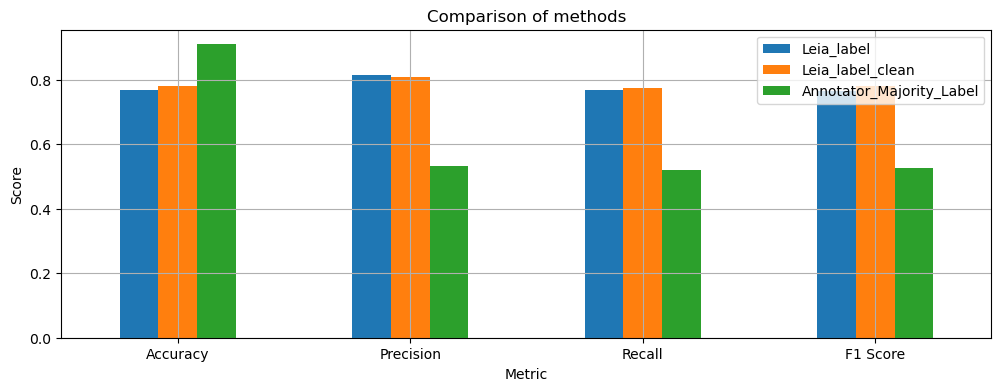

In [90]:
import matplotlib.pyplot as plt

# Plot the scores
df_scores.plot(kind='bar', rot=0, figsize=(12,4), grid=True)

# Add labels and title
plt.xlabel('Metric')
plt.ylabel('Score')
plt.title('Comparison of methods')

# Display the plot
plt.show();

The classification with "Leia_label_clean" has an accuracy of 0.78, which is higher than the other two methods. It also has a precision of 0.807, which is higher than the other two methods. The method with labeles "Leia_label_clean" has a recall of 0.776, which is higher than the other two methods. F1 Score combines precision and recall into a single metric by calculating their harmonic mean. The method labeled "Leia_label_clean" has an F1 score of 0.781, which is higher than the other two methods.
Human classifications has the highest accuracy, but lower precision, recall and F1 score. 
Based on these metrics, the method with cleaned text appears to perform better. 

To improve the models performing we can clean the text,  removing unwanted characters, symbols, and punctuation from the text. Also we can remove stop words to reduce noise and handle Emojis, which represent the true emotions. 

### Exercise 7 *(6 points)*

#### 7.1 Data annotation
* In the following exercise you will need to test emotion detection methods on data from [Vent](https://www.vent.co/), a website where users talk about their feelings. 
* On GitHub, in your `a03` folder you can find 3 files. First open `sample_for_labeling.csv`, and label each row according the emotion the sentence expresses. The possible classes are: 0 (Sadness), 1 (Affection), 2 (Fear), 3 (Happiness), 4 (Anger). ***Important: Make sure to upload the labeled data with your submission.***
* After you finished labeling the data load it as a pandas dataframe. Also load `sample_with_labels.csv` as a dataframe, which contains the actual labels of the data.
* Merge the two dataframes, and rename the column containing your labels as `label_human`.
* Rename the class ids (0, 1, 2, ...) stored in the `label`, and `label_human` columns to the class names (Sadness, Affection, ...).

In [55]:
# open file
sample = pd.read_csv('sample_for_labeling.csv')
sample = sample.drop('Unnamed: 0', axis = 1)
sample.head()

,text,label
0,there are so many questions i have honestlywha...,1
1,"I'm just gonna stop looking for my ""one"" and j...",0
2,I want you so bad. So bad. I miss you.,1
3,"i want to help people, i want to do good, i wa...",0
4,Keeping it positive no matter how negative it ...,3


In [56]:
sample2 = pd.read_csv('sample_with_labels.csv')
sample2.head()

,text,label
0,there are so many questions i have honestlywha...,1
1,"I'm just gonna stop looking for my ""one"" and j...",0
2,I want you so bad. So bad. I miss you.,0
3,"i want to help people, i want to do good, i wa...",0
4,Keeping it positive no matter how negative it ...,3


In [57]:
sample = sample.merge(sample2, on='text')
sample.columns = ['text', 'label_human', 'label']
sample.head()

,text,label_human,label
0,there are so many questions i have honestlywha...,1,1
1,"I'm just gonna stop looking for my ""one"" and j...",0,0
2,I want you so bad. So bad. I miss you.,1,0
3,"i want to help people, i want to do good, i wa...",0,0
4,Keeping it positive no matter how negative it ...,3,3


In [58]:
sample[['label_human', 'label']] = sample[['label_human', 'label']].replace({
    0: 'Sadness',
    1: 'Affection',
    2: 'Fear',
    3: 'Happiness',
    4: 'Anger'
})

In [59]:
sample.head()

,text,label_human,label
0,there are so many questions i have honestlywha...,Affection,Affection
1,"I'm just gonna stop looking for my ""one"" and j...",Sadness,Sadness
2,I want you so bad. So bad. I miss you.,Affection,Sadness
3,"i want to help people, i want to do good, i wa...",Sadness,Sadness
4,Keeping it positive no matter how negative it ...,Happiness,Happiness


#### 7.2 LEIA
* Use the [LEIA](https://huggingface.co/LEIA/LEIA-base) model introduced in the previous exercise to classify the sentences and store the results in a column named `label_leia`.

In [60]:
# add leia label 
sample['label_leia'] = sample['text'].apply(lambda x: emotions.get(model(**tokenizer(x, truncation=True, padding=True, return_tensors="pt")).logits.argmax(dim=1).item()))

In [61]:
sample.head()

,text,label_human,label,label_leia
0,there are so many questions i have honestlywha...,Affection,Affection,Happiness
1,"I'm just gonna stop looking for my ""one"" and j...",Sadness,Sadness,Sadness
2,I want you so bad. So bad. I miss you.,Affection,Sadness,Sadness
3,"i want to help people, i want to do good, i wa...",Sadness,Sadness,Sadness
4,Keeping it positive no matter how negative it ...,Happiness,Happiness,Happiness


#### 7.3 Openai models
* In the following exercise we will work with the [openai API](https://platform.openai.com/docs/api-reference), an API which allows you to access very powerful AI models. Your task will be to use a [text completion](https://platform.openai.com/docs/api-reference/completions/) or a [chat completion](https://platform.openai.com/docs/guides/chat/introduction) model to classify the sentences in `sample_with_labels.csv` according to their emotion (Sadness, Affection, Fear, Happiness, Anger).
* You can sign up for the API by providing a phone number, and get 5 USD of free credits, which should be more than enough to complete this exercise.
* If you use your own account, you can use any text completion/chat completion model to complete the exercise, you are also allowed to [fine-tune](https://platform.openai.com/docs/api-reference/fine-tunes) one of the text completion models, and use it for classification.
* If you can't/don't want to sign up for the API, we created an API wrapper, through wich you can use the `gpt-3.5-turbo` model. We set a limit of 1_000_000 tokens per API key, which should be more than enough to complete the task, so feel free to experiment to find the best prompt.
* In your `a03` folder, you can find a file named `api_key.txt`, which stores your API key you will need to use the API wrapper. ***Important: this is not a real openai API key, we use it internally in the API wrapper, to monitor usage***
* To set up the API wrapper with the openai module, run the following code:
```python
import openai
openai.api_base = 'https://smdapi-1-a6938250.deta.app'
your_api_key = '' # your key from api_key.txt
openai.api_key = your_api_key
```
* After you run this setup, you can use the `openai.ChatCompletion.create` function just like when your are using the openai module ([documentation](https://platform.openai.com/docs/guides/chat)).
* Store the results in a column named `label_gpt`.

In [62]:
import openai
openai.api_base = 'https://smdapi-1-a6938250.deta.app'
your_api_key = '63enwKSfG36TbQL375iY' # your key from api_key.txt
openai.api_key = your_api_key

In [63]:
# hint: chat completion example from https://platform.openai.com/docs/guides/chat/introduction
openai.ChatCompletion.create(
  model="gpt-3.5-turbo",
  messages=[
        {"role": "system", "content": "You are a helpful assistant."},
        {"role": "user", "content": "Who won the world series in 2020?"},
        {"role": "assistant", "content": "The Los Angeles Dodgers won the World Series in 2020."},
        {"role": "user", "content": "Where was it played?"}
    ]
)

<OpenAIObject chat.completion id=chatcmpl-7TzldKN0qBzXSCxtvtoym4p15x7Q4 at 0x7fa42400de40> JSON: {
  "id": "chatcmpl-7TzldKN0qBzXSCxtvtoym4p15x7Q4",
  "object": "chat.completion",
  "created": 1687383301,
  "model": "gpt-3.5-turbo-0301",
  "choices": [
    {
      "index": 0,
      "message": {
        "role": "assistant",
        "content": "The 2020 World Series was played at Globe Life Field in Arlington, Texas."
      },
      "finish_reason": "stop"
    }
  ],
  "usage": {
    "prompt_tokens": 57,
    "completion_tokens": 17,
    "total_tokens": 74
  }
}

In [64]:
# function to classify text 
def classify_sentence(sentence):
    response = openai.ChatCompletion.create(
      model="gpt-3.5-turbo",
        
      # train the model 
      messages=[
            {"role": "system", "content": "You are a helpful assistant that classifies sentences into categories of emotions: Sadness, Affection, Fear, Happiness, Anger. Give as an answer only one of the class."},
            {"role": "user", "content": "I miss my old friends so much."},
            {"role": "assistant", "content": "Sadness"},
            {"role": "user", "content": "I had the best day ever at the amusement park!"},
            {"role": "assistant", "content": "Happiness"},
            {"role": "user", "content": "'there are so many questions i have honestlywhat is the counterargument to the communism works _in theory_ because human nature rherotic other than capitalism is worse? how are we sure wed be able to enforce something like that ? would it have to be totalitarian ?im not as smart as i wish i was"},
            {"role": "assistant", "content": "Sadness"},
            {"role": "user", "content": "I feel weird and sad and happy"},
            {"role": "assistant", "content": "Sadness"},
            {"role": "user", "content": "I miss you"},
            {"role": "assistant", "content": "Sadness"},
            {"role": "user", "content": "I can't do this anymore"},
            {"role": "assistant", "content": "Anger"},
            {"role": "user", "content": "Oh my god!"},
            {"role": "assistant", "content": "Happiness"},
            {"role": "user", "content": f"{sentence}"},
             ]
             )
    #get the label 
    assistant_message = response['choices'][0]['message']['content']
    
    return assistant_message

In [65]:
# apply gpt classification 
sample['label_gpt'] = sample['text'].apply(classify_sentence)

In [67]:
#check result 
sample

,text,label_human,label,label_leia,label_gpt
0,there are so many questions i have honestlywha...,Affection,Affection,Happiness,Fear
1,"I'm just gonna stop looking for my ""one"" and j...",Sadness,Sadness,Sadness,Sadness
2,I want you so bad. So bad. I miss you.,Affection,Sadness,Sadness,Affection
3,"i want to help people, i want to do good, i wa...",Sadness,Sadness,Sadness,Sadness
4,Keeping it positive no matter how negative it ...,Happiness,Happiness,Happiness,Happiness
5,We are going to travel the world together one ...,Happiness,Happiness,Happiness,Affection
6,Fish Mooneys makeup in Gotham is so freaking b...,Affection,Affection,Happiness,Affection
7,Is there some unspoken rule that headphones HA...,Anger,Fear,Anger,Anger
8,Oh my god u guys were really about s4 of pll,Happiness,Happiness,Sadness,Surprise/Excitement
9,"Guys, I just want you to remember that your wo...",Affection,Affection,Happiness,Affection


In [99]:
#save result 
sample.to_csv('sample_labeled.csv')

#### 7.4 Comparison
* Compare the performance of the two models, with each other, as well as with the quality of your annotation using the metrics introduced in part 1 (accuracy, precision, recall, f1 score) or other metrics you find interesting. Create informative visualizations to aid the comparison.
* Discuss your results. 
* Are the models accurately predicting human emotions?
* Which approach seems to work better? Why?

In [92]:
# comapre accuracy 
Leia_accuracy = accuracy_score(sample['label'], sample['label_leia'])
GPT_accuracy = accuracy_score(sample['label'], sample['label_gpt'])
Human_accuracy2 = accuracy_score(sample['label'], sample['label_human'])

# comapre precision
Leia_precision = precision_score(sample['label'], sample['label_leia'], average=None)
GPT_precision = precision_score(sample['label'], sample['label_gpt'], average=None)
Human_precision = precision_score(sample['label'], sample['label_human'], average=None)

# comapre recall 
Leia_recall = recall_score(sample['label'], sample['label_leia'], average=None)
GPT_recall = recall_score(sample['label'], sample['label_gpt'], average=None)
Human_recall = recall_score(sample['label'], sample['label_human'], average=None)

# comapre F1 score
Leia_f1_score = f1_score(sample['label'], sample['label_leia'], average=None)
GPT_f1_score = f1_score(sample['label'], sample['label_gpt'], average=None)
Human_f1_score = f1_score(sample['label'], sample['label_human'], average=None)

/Users/elenaputilova/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [94]:
#convert to dataframe 
data2 = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Leia_label': [round(Leia_accuracy, 2), Leia_precision.mean(), Leia_recall.mean(), Leia_f1_score.mean()],
    'GPT_label': [round(GPT_accuracy, 2), GPT_precision.mean(), GPT_recall.mean(), GPT_f1_score.mean()],
    'Human_Label': [round(Human_accuracy2, 2), Human_precision.mean(), Human_recall.mean(), Human_f1_score.mean()]
}

# Create the DataFrame
df_scores2 = pd.DataFrame(data2)
df_scores2

,Metric,Leia_label,GPT_label,Human_Label
0,Accuracy,0.430000,0.570000,0.770000
1,Precision,0.398571,0.536706,0.802540
2,Recall,0.433333,0.472222,0.766667
3,F1 Score,0.412388,0.476394,0.760373


In [95]:
# Set the Metric column as the index for easier plotting
df_scores2.set_index('Metric', inplace=True)

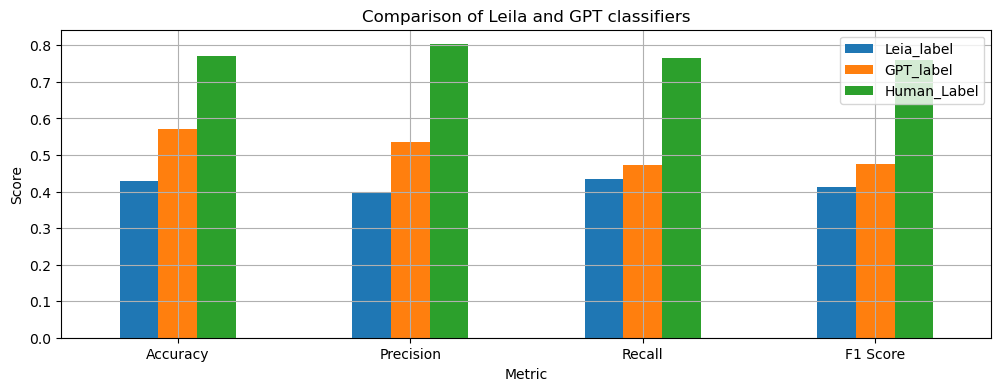

In [96]:
import matplotlib.pyplot as plt

# Plot the scores
df_scores2.plot(kind='bar', rot=0, figsize=(12,4), grid=True)

# Add labels and title
plt.xlabel('Metric')
plt.ylabel('Score')
plt.title('Comparison of Leila and GPT classifiers')

# Display the plot
plt.show();

**Result**

Accuracy: The Human labels has the highest accuracy (0.77), followed by the "GPT_label" method (0.57), and the lowest accuracy is observed in the "Leia_label" method (0.43). This metric indicates the overall correctness of the predictions.

Precision: The Human labels method has the highest precision (0.802), followed by the "GPT_label" method (0.537), and the lowest precision is observed in the "Leia_label" method (0.399). 

Recall: The Human labels method has the highest recall (0.767), followed by the "Leia_label" method (0.433), and the lowest recall is observed in the "GPT_label" method (0.472). 

F1 Score: The Human labels method has the highest F1 score (0.760), followed by the "GPT_label" method (0.476), and the lowest F1 score is observed in the "Leia_label" method (0.412). 

Based on the metrics we can conclude that human classification works better, GPT model is on the second place and Leia model has the lowest perfomance with provided data. 